# Box Box Box

Boxplots of Formula 1 pit stop duration from
https://ergast.com/mrd/db

In [1]:
%autosave 0

from etl import DATADIR, ErgastF1
from viz import Plot

f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

Autosave disabled


## How long does a pitstop take?
Get data for all available circuits and seasons.

In [2]:
stops = (
    f1.pit_stops
    .join(f1.races['season id_circuit'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .join(f1.drivers['driver'], on='id_driver')
    ['season circuit driver stop duration'.split()]
    .reset_index(drop=True)
)
stops

,season,circuit,driver,stop,duration
0,2011,Albert Park Grand Prix Circuit,Jaime Alguersuari,1,26.898
1,2011,Albert Park Grand Prix Circuit,Michael Schumacher,1,25.021
2,2011,Albert Park Grand Prix Circuit,Mark Webber,1,23.426
3,2011,Albert Park Grand Prix Circuit,Fernando Alonso,1,23.251
4,2011,Albert Park Grand Prix Circuit,Felipe Massa,1,23.842
...,...,...,...,...,...
7431,2019,Yas Marina Circuit,Charles Leclerc,2,21.274
7432,2019,Yas Marina Circuit,Sebastian Vettel,2,21.858
7433,2019,Yas Marina Circuit,Daniil Kvyat,1,21.496
7434,2019,Yas Marina Circuit,Carlos Sainz,2,21.466


## stoppage time
Pit stops take much longer at some circuits.

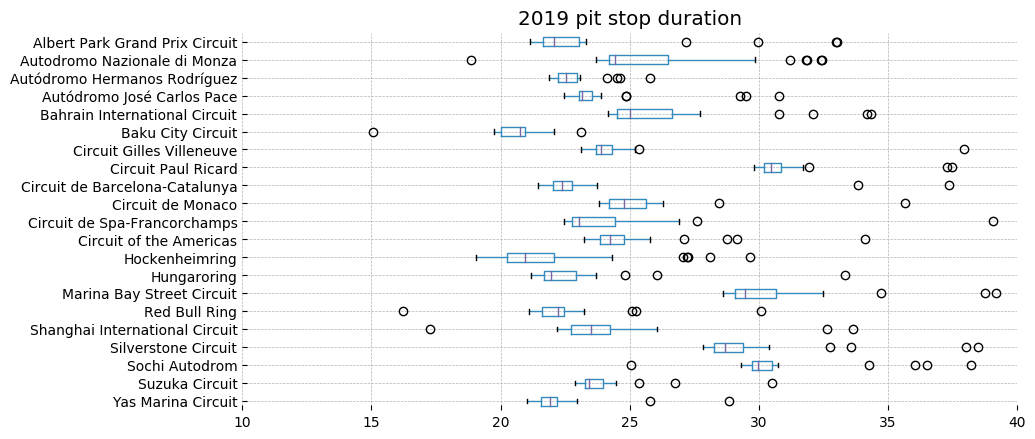

In [3]:
def alltracks(season, **kwargs):
    data = stops.loc[lambda df: df['season'].eq(2019)]
    data = data.pivot(columns='circuit', values='duration')
    kwargs.setdefault('xlim', (10, 40))
    kwargs.setdefault('title', f"{season} pit stop duration")
    plot.boxh(data, **kwargs)

alltracks(2019)

## stowe your roll
Starting in 2014, the pit lane speed limit was lowered from 100kph to 80.

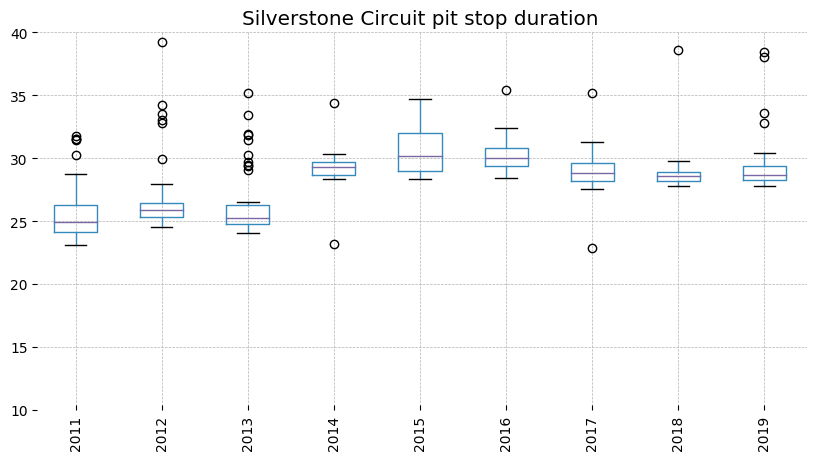

In [4]:
def onetrack(circuit, **kwargs):
    data = stops.loc[lambda df: df['circuit'].eq(circuit)]
    data = data.pivot(columns='season', values='duration')
    kwargs.setdefault('ylim', (10, 40))
    kwargs.setdefault('title', f"{circuit} pit stop duration")
    plot.box(data, **kwargs)

onetrack('Silverstone Circuit')

## paul ralentit
Before the 2019 race, the pit lane of Circuit Paul Ricard was lengthened.

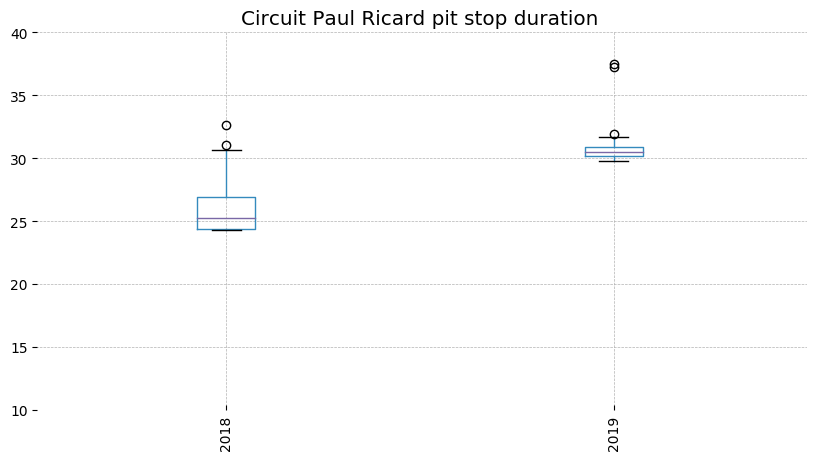

In [5]:
onetrack('Circuit Paul Ricard')